# Generic Optical Fiber - SimpleModeAnalysis

## Imports

In [1]:
import numpy as np
from Zeros import *
import matplotlib.pyplot as plt
import pandas as pd

## Ray tracing method

### TE modes:

Solving the transcendental equation:

$$hk_{0}n_{co}cos(\theta_{m})=m\pi+2tan^{-1}(\frac{[n_{co}^{2}sin^{2}(\theta_{m})-n_{cl}^{2}]^{1/2}}{n_{co}cos(\theta_{m})})$$

With the following parameters:

$$n_{co}=1.5$$
$$n_{cl}=1.0$$
$$h=1\mu m$$
$$\lambda_{0}=1\mu m$$

We obtain the following transcendental equation:

$$V(1-b)^{1/2}=m\pi+2tan^{-1}\left[\left(\frac{b}{1-b}\right)^{1/2}\right]$$

To solve the transcendental equation above, we will find the zeros of the following function:

$$V(1-b)^{1/2}-m\pi-2tan^{-1}\left[\left(\frac{b}{1-b}\right)^{1/2}\right]=0$$

To visually identify the intervals where the mentioned roots lie, we will observe the intersection of the following two functions:

$$S(b)=V(1-b)^{1/2}$$
$$R(b)=m\pi+2tan^{-1}\left[\left(\frac{b}{1-b}\right)^{1/2}\right]$$

In [2]:
def S(b, V):
    s_operation = V*np.sqrt((1-b))
    return s_operation

def R(b,m):
    r_operation = m*np.pi+2*np.arctan(np.sqrt(b/(1-b)))
    return r_operation

Given the provided parameters:

In [3]:
h, ko, nco, ncl = 10 ** -6, (2*np.pi)/(10 ** -6), 1.5, 1
v = h*ko*np.sqrt((nco ** 2)-(ncl ** 2))

The possible intersections between S(b) and R(b) are shown in the following graph, namely, only in modes 0, 1, and 2:

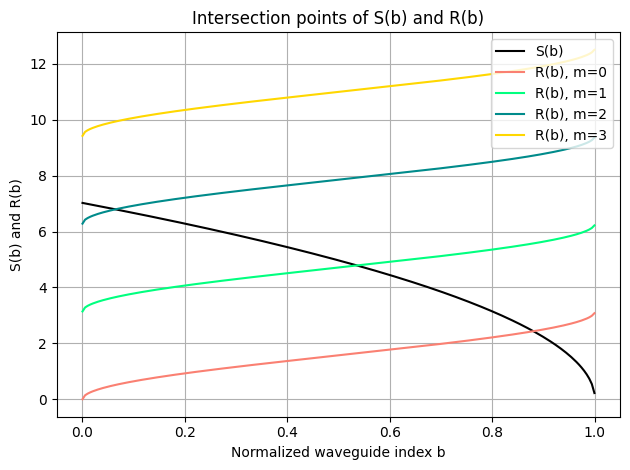

In [4]:
x = np.linspace(0,0.999,200)
fig, ax = plt.subplots()
ax.plot(x,S(x,v), label='S(b)', color='black')
ax.plot(x,R(x,0), label='R(b), m=0', color='#FA8072')
ax.plot(x,R(x,1), label='R(b), m=1', color='#00FF7F')
ax.plot(x,R(x,2), label='R(b), m=2', color='#008B8B')
ax.plot(x,R(x,3), label='R(b), m=3', color='#FFD700')
ax.set(xlabel='Normalized waveguide index b', ylabel='S(b) and R(b)',
       title='Intersection points of S(b) and R(b)')
ax.grid()
plt.legend(loc='upper right')
fig.tight_layout()
plt.savefig('Intersection points of S(b) and R(b).png')
plt.show()

Applying the Newton's method to find roots 0, 1, and 2:

In [5]:
def tras(b,V,m):
    g = V*np.sqrt((1-b)) - (m*np.pi+2*np.arctan(np.sqrt(b/(1-b))))
    return g

In [6]:
def m_0(b):
    g = tras(b,v,0)
    return g

def m_1(b):
    g = tras(b,v,1)
    return g

def m_2(b):
    g = tras(b,v,2)
    return g

def m_3(b):
    g = tras(b,v,3)
    return g

In [7]:
m_00, m_01, m_02 = Newton(m_0, 0.5), Newton(m_1, 0.5),Newton(m_2, 0.5)
print('Root m=0: ', m_00, ',root m=1: ', m_01, 'y root m=2: ', m_02)

Root m=0:  0.8799514025795133 ,root m=1:  0.5360949519999546 y root m=2:  0.0642068778129875


Verifying the nonexistence of the root m=3:

Newton(m_3, 0.8)

Finding the angle, effective refractive index, and propagation constant of mode m:

In [8]:
def param(b):
    angulo = np.arcsin(np.sqrt((b*((nco ** 2) - (ncl ** 2)) + (ncl ** 2)) / (nco ** 2)))
    indice_refectivo = nco * np.sin(angulo)
    c_propagacion = ko * nco * np.sin(angulo)
    return angulo, indice_refectivo, c_propagacion

ang_00, in_re_00, c_prop_00 = param(m_00)
ang_01, in_re_01, c_prop_01 = param(m_01)
ang_02, in_re_02, c_prop_02 = param(m_02)

df = pd.DataFrame()
df['Mode'] = [0 ,1 ,2]
df['Angle'] = [np.degrees(ang_00), np.degrees(ang_01), np.degrees(ang_02)]
df['Effective refractive index'] = [in_re_00, in_re_01, in_re_02]
df['Propagation constant'] = [c_prop_00, c_prop_01, c_prop_02]
df

,Mode,Angle,Effective refractive index,Propagation constant
0,0,75.033682,1.449117,9.105069e+06
1,1,59.491495,1.292331,8.119953e+06
2,2,43.860369,1.039355,6.530459e+06


### TM modes:

Solving the transcendental equation:

$$hk_{0}n_{co}cos(\theta_{m})=m\pi+2tan^{-1}\left(\frac{n_{co}^2[n_{co}^{2}sin^{2}(\theta_{m})-n_{cl}^{2}]^{1/2}}{n_{cl}^{2}n_{co}cos(\theta_{m})}\right)$$

To solve this transcendental equation, we find the zeros of the following function:

$$hk_{0}n_{co}cos(\theta_{m})-m\pi-2tan^{-1}\left(\frac{n_{co}^2[n_{co}^{2}sin^{2}(\theta_{m})-n_{cl}^{2}]^{1/2}}{n_{cl}^{2}n_{co}cos(\theta_{m})}\right)=0$$

To visually determine the intervals where the mentioned roots lie, we will observe the intersection of the following two functions:

$$F(\theta_{m})=hk_{0}n_{co}cos(\theta_{m})$$

$$G(\theta_{m})=m\pi+2tan^{-1}\left(\frac{n_{co}^2[n_{co}^{2}sin^{2}(\theta_{m})-n_{cl}^{2}]^{1/2}}{n_{cl}^{2}n_{co}cos(\theta_{m})}\right)$$

In [9]:
np.sin(1.570796)

0.9999999999999466

In [10]:
def F(theta):
    f_operation = h*ko*nco*np.cos(theta)
    return f_operation

In [11]:
def G(theta, m):
    g_operation = m*np.pi + 2*np.arctan(((nco**2) * (((nco**2)*((np.sin(theta))**2) - (ncl**2))**(1/2)))  /  ((ncl**2)*nco*np.cos(theta)))
    return g_operation

The possible intersections between S(b) and R(b) are those shown in the following graph, namely, only in modes 0, 1, and 2:

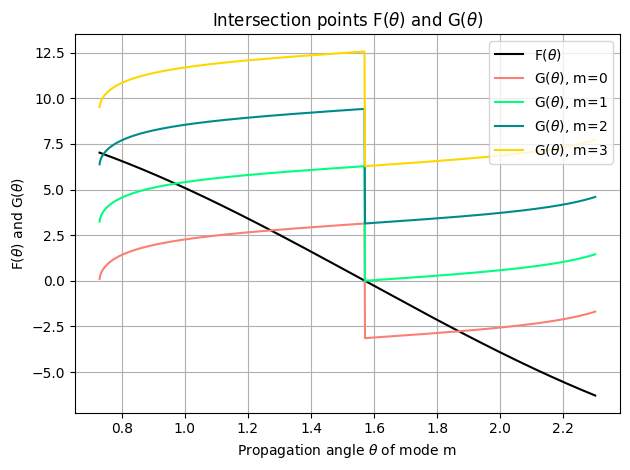

In [12]:
xx = np.linspace(0.73,np.pi/2+0.73,1000)
fig, ax = plt.subplots()
ax.plot(xx,F(xx), label= r'F($\theta$)', color='black')
ax.plot(xx,G(xx,0), label= r'G($\theta$), m=0', color='#FA8072')
ax.plot(xx,G(xx,1), label= r'G($\theta$), m=1', color='#00FF7F')
ax.plot(xx,G(xx,2), label= r'G($\theta$), m=2', color='#008B8B')
ax.plot(xx,G(xx,3), label= r'G($\theta$), m=3', color='#FFD700')

ax.set(xlabel=r'Propagation angle $\theta$ of mode m', ylabel=r'F($\theta$) and G($\theta$)',
       title=r'Intersection points F($\theta$) and G($\theta$)')
ax.grid()
plt.legend(loc='upper right')
fig.tight_layout()
plt.savefig(r'Intersection points F($\theta$) and G($\theta$)')
plt.show()

As observed, propagation only exists in modes 0, 1, and 2. It appears, according to the graph, that for the first mode there are 3 solutions, for the second 2, and for the third 1; however, the function on the vertical lines is not continuous, the drawn line appears due to the joining of the two values taken by the graphs at $\pi/2$.

Now, finding the two solutions of the fundamental mode:

In [13]:
def TM_zeros(theta, m):
    TM_zeros_operation = F(theta) - G(theta,m)
    return TM_zeros_operation

In [14]:
def m_0_TM(theta):
    r = TM_zeros(theta,0)
    return r

In [15]:
m_TM_00 = Newton(m_0_TM, 1.8), Newton(m_0_TM, 1.2)
m_TM_00

(1.8685999239388174, 1.2729927296509758)

Proceeding in the same manner for the mode of order 1:

In [16]:
def m_1_TM(theta):
    r = TM_zeros(theta,1)
    return r

In [17]:
m_TM_01 = Newton(m_1_TM, 1.8)
m_TM_01

0.9699283387496284

Lastly, for m=2:

In [18]:
def m_2_TM(theta):
    r = TM_zeros(theta,2)
    return r

In [19]:
m_TM_02 = Newton(m_2_TM, 0.73)
m_TM_02

0.7424247755766693

Reporting the angles in degrees along with the effective refractive index and the propagation constant:

In [20]:
def param_TM(theta):
    angulo = np.degrees(theta)
    indice_refectivo = nco * np.sin(theta)
    c_propagacion = ko * nco * np.sin(theta)
    return angulo, indice_refectivo, c_propagacion

In [21]:
param_TM(m_TM_00[1]), param_TM(m_TM_01), param_TM(m_TM_02)

ang_00_TM, in_re_00_TM, c_prop_00_TM = param_TM(m_TM_00[1])
ang_01_TM, in_re_01_TM, c_prop_01_TM = param_TM(m_TM_01)
ang_02_TM, in_re_02_TM, c_prop_02_TM = param_TM(m_TM_02)

df_TM = pd.DataFrame()
df_TM['Mode'] = [0 ,1 ,2]
df_TM['Angle'] = [ang_00_TM, ang_01_TM,ang_02_TM]
df_TM['Effective refractive index'] = [in_re_00_TM, in_re_01_TM, in_re_02_TM]
df_TM['Propagation constant'] = [c_prop_00_TM, c_prop_01_TM, c_prop_02_TM]
df_TM

,Mode,Angle,Effective refractive index,Propagation constant
0,0,72.937111,1.433975,9.009930e+06
1,1,55.572800,1.237268,7.773983e+06
2,2,42.537806,1.014115,6.371871e+06


## Waveguide Method

### TE modes:

To find the angle, effective refractive index, and propagation constant of TE modes using the waveguide method, the following transcendental equation is used:

$$tan(k_{x}h)=\frac{2\alpha_{x}}{k_{x}\left(1-\frac{\alpha_{x}^{2}}{k_{x}^{2}}\right)}$$

Such that:

$$\alpha_{x}=(\beta^{2}-k_{0}^{2}n_{cl}^{2})^{1/2}$$
$$k_{x}=(k_{0}^{2}n_{co}^{2}-\beta^{2})^{1/2}$$

So, the transcendental equation would have the following structure:

$$tan[(k_{0}^{2}n_{co}^{2}-\beta^{2})^{1/2}h]=\frac{2(\beta^{2}-k_{0}^{2}n_{cl}^{2})^{1/2}}{(k_{0}^{2}n_{co}^{2}-\beta^{2})^{1/2}\left(1-\frac{\beta^{2}-k_{0}^{2}n_{cl}^{2}}{k_{0}^{2}n_{co}^{2}-\beta^{2}}\right)}$$

Therefore, the equation for which we need to find the roots is:

$$tan[(k_{0}^{2}n_{co}^{2}-\beta^{2})^{1/2}h]-\frac{2(\beta^{2}-k_{0}^{2}n_{cl}^{2})^{1/2}}{(k_{0}^{2}n_{co}^{2}-\beta^{2})^{1/2}\left(1-\frac{\beta^{2}-k_{0}^{2}n_{cl}^{2}}{k_{0}^{2}n_{co}^{2}-\beta^{2}}\right)}=0$$

Graphing the rational and tangent functions to observe their intersection and, thus, provide the nearby point to the zero for the numerical method to converge with:

$$J(\beta)=tan[(k_{0}^{2}n_{co}^{2}-\beta^{2})^{1/2}h]$$

$$L(\beta)=\frac{2(\beta^{2}-k_{0}^{2}n_{cl}^{2})^{1/2}}{(k_{0}^{2}n_{co}^{2}-\beta^{2})^{1/2}\left(1-\frac{\beta^{2}-k_{0}^{2}n_{cl}^{2}}{k_{0}^{2}n_{co}^{2}-\beta^{2}}\right)}$$

In [22]:
def J(beta):
    j_operation = np.tan(h *   (((ko**2)*(nco**2)-((beta * (10 ** 6))**2)) ** (1/2)))
    return j_operation

In [23]:
def L(beta):
    ax = np.sqrt(((beta * (10 ** 6))**2) - (ko**2)*(ncl**2))
    kx = np.sqrt(-((beta * (10 ** 6))**2) + (ko**2)*(nco**2))
    l_operation = (2*ax)/(kx * (1 - (ax**2)/(kx**2)))
    return l_operation

In [24]:
((6.3 * (10 ** 6))**2)-(ko**2)*(ncl**2), (ko**2)*(nco**2)-((9.3 * (10 ** 6))**2)

(211582395642.5625, 2336439609804.2344)

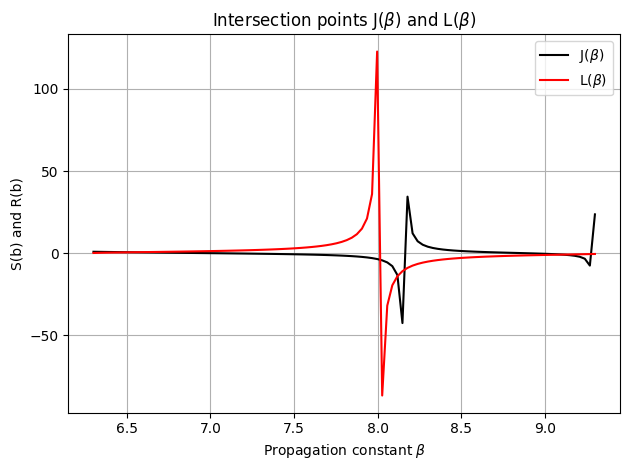

In [25]:
xxx = np.linspace(6.3,9.3,100)
fig, ax = plt.subplots()
ax.plot(xxx,J(xxx), label=r'J($\beta$)', color='black')
ax.plot(xxx,L(xxx), label=r'L($\beta$)', color='red')
ax.set(xlabel=r'Propagation constant $\beta$', ylabel='S(b) and R(b)',
       title=r'Intersection points J($\beta$) and L($\beta$)')
ax.grid()
plt.legend(loc='upper right')
fig.tight_layout()
plt.savefig('Intersection points J(beta) and L(beta).png')
plt.show()

Now, applying Newton's method to find the roots:

In [26]:
def JL(beta):
    jl_operation = (J(beta) - L(beta))
    return jl_operation

In [27]:
Newton(JL,6.4), Newton(JL,8.1), Newton(JL,9)

(6.530459403719585, 8.119953392271565, 9.10506885106174)

Thus, the propagation constant, effective refractive index, and angle at which each mode propagates would be:

In [28]:
def param_TE_wave(prop):
    angulo = np.degrees(np.arcsin((prop * (10**6))/(ko*nco)))
    ang = np.arcsin((prop * (10**6))/(ko*nco))
    in_re = nco*np.sin(ang)
    return angulo, in_re

In [29]:
ang_00_TE_wave, in_re_00_TE_wave = param_TE_wave(Newton(JL,9))
ang_01_TE_wave, in_re_01_TE_wave = param_TE_wave(Newton(JL,8.1))
ang_02_TE_wave, in_re_02_TE_wave = param_TE_wave(Newton(JL,6.4))

df_TE_wave = pd.DataFrame()
df_TE_wave['Mode'] = [0 ,1 ,2]
df_TE_wave['Angle'] = [ang_00_TE_wave, ang_01_TE_wave,ang_02_TE_wave]
df_TE_wave['Effective refractive index'] = [in_re_00_TE_wave, in_re_01_TE_wave, in_re_02_TE_wave]
df_TE_wave['Propagation constant x 10^6'] = [Newton(JL,9), Newton(JL,8.1), Newton(JL,6.4)]
df_TE_wave

,Mode,Angle,Effective refractive index,Propagation constant x 10^6
0,0,75.033682,1.449117,9.105069
1,1,59.491495,1.292331,8.119953
2,2,43.860369,1.039355,6.530459


### TM Modes:

TM modes can be found using the waveguide method through the following equation:

$$tan(k_{x}h)=\frac{2\alpha_{x}\frac{n_{co}^{2}}{n_{cl}^{2}}}{k_{x}\left(1-\frac{n_{co}^{4}}{n_{cl}^{4}}\frac{\alpha_{x}^{2}}{k_{x}^{2}}\right)}$$

The roots would be found from the following function:

$$tan(k_{x}h)-\frac{2\alpha_{x}\frac{n_{co}^{2}}{n_{cl}^{2}}}{k_{x}\left(1-\frac{n_{co}^{4}}{n_{cl}^{4}}\frac{\alpha_{x}^{2}}{k_{x}^{2}}\right)}=0$$

Graphing the rational and tangent functions to observe their intersection and, thus, provide the nearby point to the zero for the numerical method to converge with:

$$Q(\beta)=tan(k_{x}h)$$

$$W(\beta)=\frac{2\alpha_{x}\frac{n_{co}^{2}}{n_{cl}^{2}}}{k_{x}\left(1-\frac{n_{co}^{4}}{n_{cl}^{4}}\frac{\alpha_{x}^{2}}{k_{x}^{2}}\right)}$$

In [30]:
def Q(beta):
    ax = np.sqrt(((beta * (10 ** 6))**2) - (ko**2)*(ncl**2))
    kx = np.sqrt(-((beta * (10 ** 6))**2) + (ko**2)*(nco**2))
    q_operation = np.tan(kx*h)
    return q_operation

In [31]:
def W(beta):
    ax = np.sqrt(((beta * (10 ** 6))**2) - (ko**2)*(ncl**2))
    kx = np.sqrt(-((beta * (10 ** 6))**2) + (ko**2)*(nco**2))
    w_operation = (2*ax*((nco**2) / (ncl**2))) / (kx*(1 - ((nco**4) / (ncl**4))*((ax**2) / (kx**2))))
    return w_operation

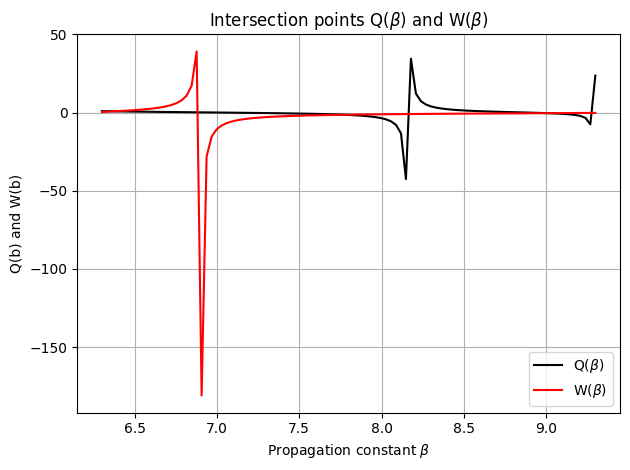

In [32]:
xxxx = np.linspace(6.3,9.3,100)
fig, ax = plt.subplots()
ax.plot(xxxx,Q(xxxx), label=r'Q($\beta$)', color='black')
ax.plot(xxxx,W(xxxx), label=r'W($\beta$)', color='red')
ax.set(xlabel=r'Propagation constant $\beta$', ylabel='Q(b) and W(b)',
       title=r'Intersection points Q($\beta$) and W($\beta$)')
ax.grid()
plt.legend(loc='lower right')
fig.tight_layout()
plt.savefig('Intersection points Q(beta) and W(beta).png')
plt.show()

Now, applying Newton's method to find the roots:

In [33]:
def QW(beta):
    qw_operation = (Q(beta) - W(beta))
    return qw_operation

In [34]:
Newton(QW,6.4), Newton(QW,8.1), Newton(QW,9)

(6.371871350804092, 7.773982872837435, 9.009930013154761)

Thus, the propagation constant, effective refractive index, and angle at which each mode propagates would be:

In [35]:
def param_TM_wave(prop):
    angulo = np.degrees(np.arcsin((prop * (10**6))/(ko*nco)))
    ang = np.arcsin((prop * (10**6))/(ko*nco))
    in_re = nco*np.sin(ang)
    return angulo, in_re

In [36]:
ang_00_TM_wave, in_re_00_TM_wave = param_TM_wave(Newton(QW,9))
ang_01_TM_wave, in_re_01_TM_wave = param_TM_wave(Newton(QW,8.1))
ang_02_TM_wave, in_re_02_TM_wave = param_TM_wave(Newton(QW,6.4))

df_TM_wave = pd.DataFrame()
df_TM_wave['Mode'] = [0 ,1 ,2]
df_TM_wave['Angle'] = [ang_00_TM_wave, ang_01_TM_wave,ang_02_TM_wave]
df_TM_wave['Effective refractive index'] = [in_re_00_TM_wave, in_re_01_TM_wave, in_re_02_TM_wave]
df_TM_wave['Propagation constant x 10^6'] = [Newton(QW,9), Newton(QW,8.1), Newton(QW,6.4)]
df_TM_wave

,Mode,Angle,Effective refractive index,Propagation constant x 10^6
0,0,72.937111,1.433975,9.009930
1,1,55.572800,1.237268,7.773983
2,2,42.537806,1.014115,6.371871


## Electric and magnetic field for TE and TM modes

### Electric field

In [37]:
def Field_TE_01(beta, x):
    ax = np.sqrt(((beta * (10 ** 6))**2) - (ko**2)*(ncl**2))
    kx = np.sqrt(-((beta * (10 ** 6))**2) + (ko**2)*(nco**2))
    fte = (np.cos(kx*h)+(ax/kx)*np.sin(kx*h))*np.exp(-ax*(x-h))
    return fte

def Field_TE_02(beta, x):
    ax = np.sqrt(((beta * (10 ** 6))**2) - (ko**2)*(ncl**2))
    kx = np.sqrt(-((beta * (10 ** 6))**2) + (ko**2)*(nco**2))
    fte = np.cos(kx*x)+(ax/kx)*np.sin(kx*x)
    return fte

def Field_TE_03(beta, x):
    ax = np.sqrt(((beta * (10 ** 6))**2) - (ko**2)*(ncl**2))
    kx = np.sqrt(-((beta * (10 ** 6))**2) + (ko**2)*(nco**2))
    fte = np.exp(ax*x)
    return fte

For the fundamental mode:

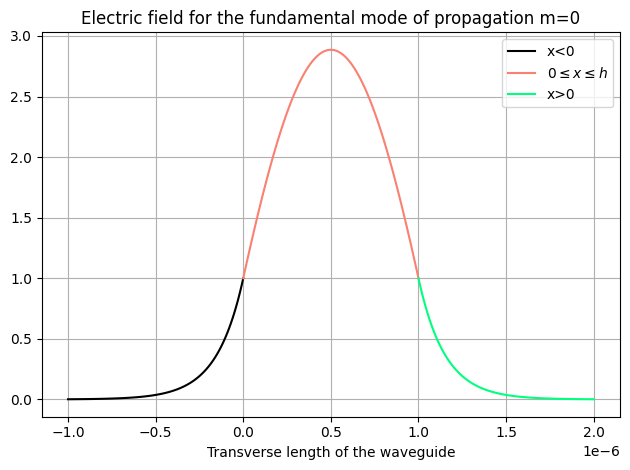

In [38]:
qq = np.linspace(-1*(10 ** -6),0*(10 ** -6),100)
ww = np.linspace(0*(10 ** -6),1*(10 ** -6),100)
ee = np.linspace(1*(10 ** -6),2*(10 ** -6),100)
fig, ax = plt.subplots()
ax.plot(qq,Field_TE_03(Newton(JL,9), qq), label= 'x<0', color='black')
ax.plot(ww,Field_TE_02(Newton(JL,9), ww), label= r'$0\leq{x}\leq{h}$', color='#FA8072')
ax.plot(ee,Field_TE_01(Newton(JL,9), ee), label= 'x>0', color='#00FF7F')

ax.set(xlabel='Transverse length of the waveguide', ylabel='',
       title='Electric field for the fundamental mode of propagation m=0')
ax.grid()
plt.legend(loc='upper right')
fig.tight_layout()
plt.savefig('Electric field for the fundamental mode of propagation m=0.png')
plt.show()

For the first mode:

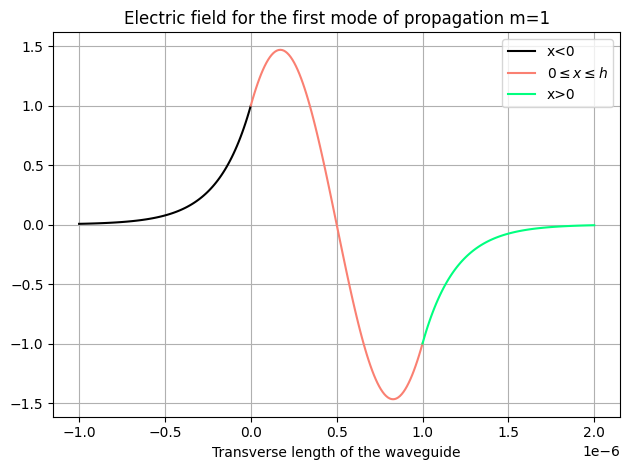

In [39]:
rr = np.linspace(-1*(10 ** -6),0*(10 ** -6),100)
tt = np.linspace(0*(10 ** -6),1*(10 ** -6),100)
yy = np.linspace(1*(10 ** -6),2*(10 ** -6),100)
fig, ax = plt.subplots()
ax.plot(rr,Field_TE_03(Newton(JL,8.1), rr), label= 'x<0', color='black')
ax.plot(tt,Field_TE_02(Newton(JL,8.1), tt), label= r'$0\leq{x}\leq{h}$', color='#FA8072')
ax.plot(yy,Field_TE_01(Newton(JL,8.1), yy), label= 'x>0', color='#00FF7F')

ax.set(xlabel='Transverse length of the waveguide', ylabel='',
       title='Electric field for the first mode of propagation m=1')
ax.grid()
plt.legend(loc='upper right')
fig.tight_layout()
plt.savefig('Electric field for the first mode of propagation m=1.png')
plt.show()

For the second mode:

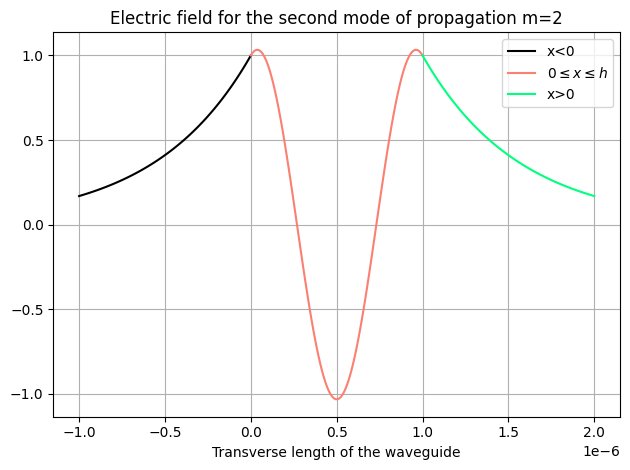

In [40]:
uu = np.linspace(-1*(10 ** -6),0*(10 ** -6),100)
ii = np.linspace(0*(10 ** -6),1*(10 ** -6),100)
oo = np.linspace(1*(10 ** -6),2*(10 ** -6),100)
fig, ax = plt.subplots()
ax.plot(uu,Field_TE_03(Newton(JL,6.4), uu), label= 'x<0', color='black')
ax.plot(ii,Field_TE_02(Newton(JL,6.4), ii), label= r'$0\leq{x}\leq{h}$', color='#FA8072')
ax.plot(oo,Field_TE_01(Newton(JL,6.4), oo), label= 'x>0', color='#00FF7F')

ax.set(xlabel='Transverse length of the waveguide', ylabel='',
       title='Electric field for the second mode of propagation m=2')
ax.grid()
plt.legend(loc='upper right')
fig.tight_layout()
plt.savefig('Electric field for the second mode of propagation m=2.png')
plt.show()

## Magnetic field

In [41]:
def Field_TM_01(beta, x):
    ax = np.sqrt(((beta * (10 ** 6))**2) - (ko**2)*(ncl**2))
    kx = np.sqrt(-((beta * (10 ** 6))**2) + (ko**2)*(nco**2))
    fte = (np.cos(kx*h)+((nco**2) / (ncl**2))*(ax/kx)*np.sin(kx*h))*np.exp(-ax*(x-h))
    return fte

def Field_TM_02(beta, x):
    ax = np.sqrt(((beta * (10 ** 6))**2) - (ko**2)*(ncl**2))
    kx = np.sqrt(-((beta * (10 ** 6))**2) + (ko**2)*(nco**2))
    fte = np.cos(kx*x)+((nco**2) / (ncl**2))*(ax/kx)*np.sin(kx*x)
    return fte

def Field_TM_03(beta, x):
    ax = np.sqrt(((beta * (10 ** 6))**2) - (ko**2)*(ncl**2))
    kx = np.sqrt(-((beta * (10 ** 6))**2) + (ko**2)*(nco**2))
    fte = np.exp(ax*x)
    return fte

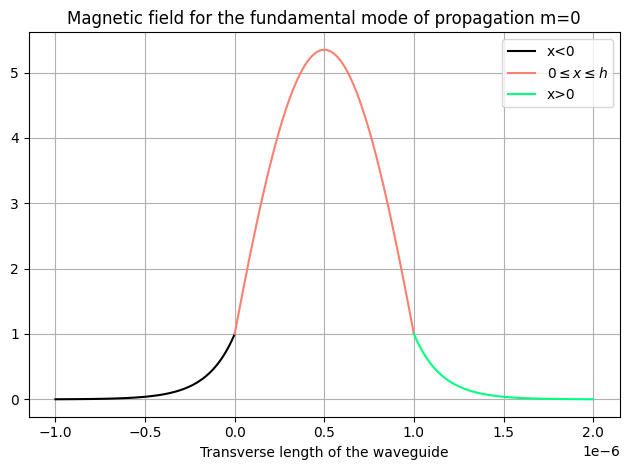

In [42]:
aa = np.linspace(-1*(10 ** -6),0*(10 ** -6),100)
ss = np.linspace(0*(10 ** -6),1*(10 ** -6),100)
dd = np.linspace(1*(10 ** -6),2*(10 ** -6),100)
fig, ax = plt.subplots()
ax.plot(aa,Field_TM_03(Newton(QW,9), aa), label= 'x<0', color='black')
ax.plot(ss,Field_TM_02(Newton(QW,9), ss), label= r'$0\leq{x}\leq{h}$', color='#FA8072')
ax.plot(dd,Field_TM_01(Newton(QW,9), dd), label= 'x>0', color='#00FF7F')

ax.set(xlabel='Transverse length of the waveguide', ylabel='',
       title='Magnetic field for the fundamental mode of propagation m=0')
ax.grid()
plt.legend(loc='upper right')
fig.tight_layout()
plt.savefig('Magnetic field for the fundamental mode of propagation m=0.png')
plt.show()

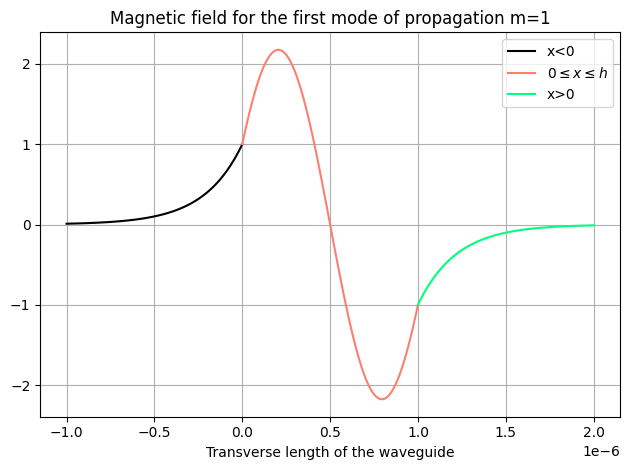

In [43]:
ff = np.linspace(-1*(10 ** -6),0*(10 ** -6),100)
gg = np.linspace(0*(10 ** -6),1*(10 ** -6),100)
hh = np.linspace(1*(10 ** -6),2*(10 ** -6),100)
fig, ax = plt.subplots()
ax.plot(ff,Field_TM_03(Newton(QW,8.1), ff), label= 'x<0', color='black')
ax.plot(gg,Field_TM_02(Newton(QW,8.1), gg), label= r'$0\leq{x}\leq{h}$', color='#FA8072')
ax.plot(hh,Field_TM_01(Newton(QW,8.1), hh), label= 'x>0', color='#00FF7F')

ax.set(xlabel='Transverse length of the waveguide', ylabel='',
       title='Magnetic field for the first mode of propagation m=1')
ax.grid()
plt.legend(loc='upper right')
fig.tight_layout()
plt.savefig('Magnetic field for the first mode of propagation m=1.png')
plt.show()

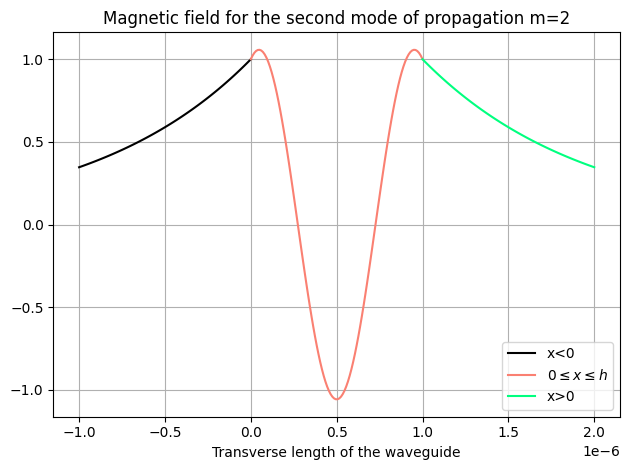

In [44]:
uu = np.linspace(-1*(10 ** -6),0*(10 ** -6),100)
ii = np.linspace(0*(10 ** -6),1*(10 ** -6),100)
oo = np.linspace(1*(10 ** -6),2*(10 ** -6),100)
fig, ax = plt.subplots()
ax.plot(uu,Field_TM_03(Newton(QW,6.4), uu), label= 'x<0', color='black')
ax.plot(ii,Field_TM_02(Newton(QW,6.4), ii), label= r'$0\leq{x}\leq{h}$', color='#FA8072')
ax.plot(oo,Field_TM_01(Newton(QW,6.4), oo), label= 'x>0', color='#00FF7F')

ax.set(xlabel='Transverse length of the waveguide', ylabel='',
       title='Magnetic field for the second mode of propagation m=2')
ax.grid()
plt.legend(loc='lower right')
fig.tight_layout()
plt.savefig('Magnetic field for the second mode of propagation m=2.png')
plt.show()